In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sts
import math

from scipy.stats import weibull_min
%matplotlib inline

### Часть 1.1. Функция плотности распределния Вейбулла

Распределение **Вейбулла**. 

Cсылка в Wikipedia: https://en.wikipedia.org/wiki/Weibull_distribution

In [2]:
#коэффициент формы
k = 1.5
#коэффициент масштаба
lamda = 1
#задаю выборку случайных величин по распределнию Вейбулла
weib = sts.weibull_min(k, scale=lamda)
weib_random = weib.rvs(size=1000)

Text(0.5, 0, '$x$')

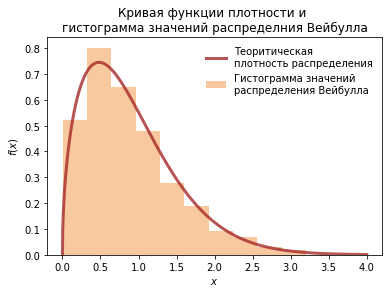

In [3]:
#построения графика кривой функции плотности и гистограммы распределния значений
x = np.linspace(0, 4 ,1000)
weib_pdf = weib.pdf(x)
plt.plot(x, weib_pdf, color='brown', lw=3, alpha=0.8, label='Теоритическая \nплотность распределения')
plt.hist(weib_random, density=True, color = 'sandybrown', alpha=0.6, label='Гистограмма значений \nраспределения Вейбулла')
plt.legend(loc='best', frameon=False)
plt.title('Кривая функции плотности и \nгистограмма значений распределния Вейбулла')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### Часть 1.2. Расчет параметров распределения

**Математическое ожидание:**
$$\mu=\lambda\Gamma \big(1+\frac{1}{k}\big)$$
где $\lambda$ - коэффициент масштаба, $k$ - коэффициент формы, $\Gamma$ - это гамма-функция.

In [4]:
#расчет мат.ожидания:
m = lamda*scipy.special.gamma(1+1/k)
m_r = round(m,2)
print('Математическое ожидание распределния Вейбулла: ', m_r) 

Математическое ожидание распределния Вейбулла:  0.9


**Дисперсия:**
$$\sigma^2=\lambda^2\bigg[\Gamma \big(1+\frac{2}{k}\big)\bigg]-\mu^2$$
где $\lambda$ - коэффициент масштаба, $k$ - коэффициент формы, $\Gamma$ - это гамма-функция, $\mu$ - мат.ожидание.

In [5]:
#расчет дисперсии
d = lamda**2*scipy.special.gamma(1+2/k)-m**2
d_r = round(d,2)
print('Дисперсия распределния Вейбулла: ', d_r) 

Дисперсия распределния Вейбулла:  0.38


### Часть 2.  Оценка распределения выборочного среднего случайной величины при разных объёмах выборок

In [6]:
#функция для получения выборочных средних из 1000 выборок с заданным объемом (n)
def v_mean(n, k=1.5, lamda=1):
    i = 0
    all_mean = []
    while i<1000:
        weibull = weib.rvs(size=n)
        mn = np.mean(weibull)
        all_mean.append(mn)
        i+=1
    return all_mean

In [29]:
def grafic(x, n):
    gist = v_mean(n)
        #расчет функции плотности нормального распределния
    norm_rv = sts.norm(m, math.sqrt(d/n))
    norm_pdf = norm_rv.pdf(x)
        #параметры графика
    plt.plot(x, norm_pdf, color='brown', lw=3, alpha=0.8, label='Кривая плотноти \nнормального распределения')
    plt.hist(gist, density=True, color = 'sandybrown', alpha=0.6, label='Гистограмма выборочных средних')
    plt.legend(loc='center left', frameon=False)
    plt.title('Кривая функции плотности нормального распределения и \nгистограмма выборочных средних \nраспределния Вейбулла при n = {}'.format(n))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

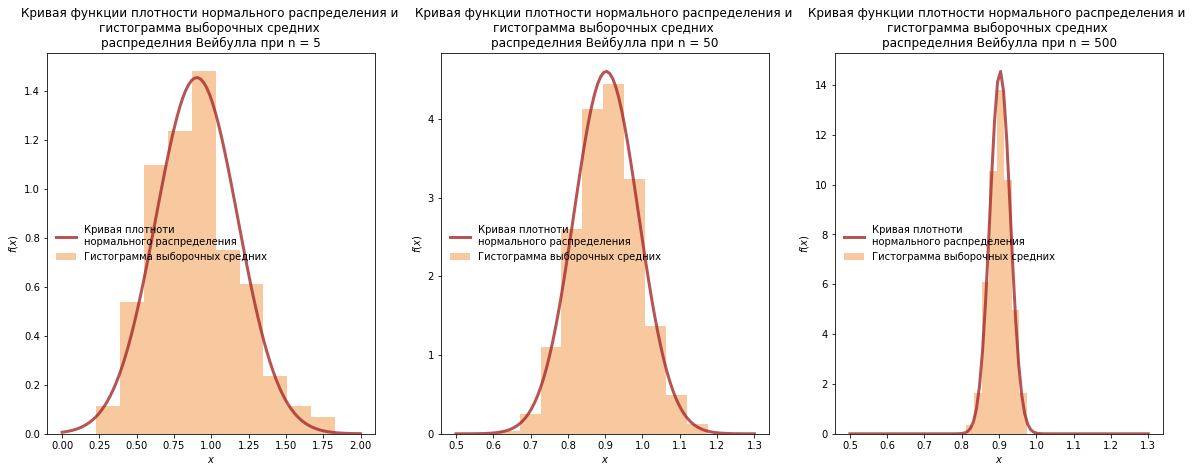

In [30]:
#первый объем выборки
n1=5
x1 = np.linspace(0, 2 ,100)
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
    #построение 1 графика
grafic(x1, n1)

#второй объем выборки
n2=50
x2 = np.linspace(0.5, 1.3 ,100)
plt.subplot(1,3,2)
    #построение 2 графика
grafic(x2, n2)

#третий объем выборки
n3=500
x3 = np.linspace(0.5, 1.3 ,100)
plt.subplot(1,3, 3)
    #построение 3 графика
grafic(x3, n3)


In [34]:
#доверительные интервалы
def dov_int(n):
    x1 = m+2*math.sqrt(d/n)
    x2 = m-2*math.sqrt(d/n)
    x = x1-x2
    print('95% доверительный интервал, при n = {}: {} < {} < {}'.format(n, round(x2,2), round(m,2), round(x1,2)))
    print('Размах - {}'.format(round(x,2)))

dov_int(n1)
dov_int(n2)
dov_int(n3)

95% доверительный интервал, при n = 5: 0.35 < 0.9 < 1.45
Размах - 1.1
95% доверительный интервал, при n = 50: 0.73 < 0.9 < 1.08
Размах - 0.35
95% доверительный интервал, при n = 500: 0.85 < 0.9 < 0.96
Размах - 0.11
None


Как можно заметить из графиков и значений разброса доверительного интервала, с увеличением объема выборки точность оценок возрастает, распределние все больше стремится к нормальному.